# Support Vector Machine (SVM) Classification on PCA dataset

Link to Excel file of extracted features: https://drive.google.com/drive/u/1/folders/1ZMbW7HxNkBUAlnT-_lXLD4J_r0A778SJ

In [2]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV


In [3]:
# read in features csv file
df = pd.read_csv('pca_features.csv')
df

,PC1,PC2,PC3,PC4,PC5,label
0,3.578898,0.395738,-0.047779,0.014839,-0.042165,ck_pre
1,0.336555,-0.201751,1.707125,0.596749,-0.009439,ck_pre
2,1.249003,0.456976,2.923192,1.710269,-0.003426,ck_pre
3,1.895098,0.237179,0.107955,0.098686,-0.021157,ck_pre
4,0.187784,-0.567702,0.276168,-0.571162,-0.005510,ck_pre
...,...,...,...,...,...,...
283,-1.933990,2.119364,1.530949,1.577346,1.010596,ck_med
284,-2.009835,2.035656,1.940617,1.466609,0.787319,ck_med
285,-3.796804,0.768672,1.941153,0.378488,0.410919,ck_med
286,-1.834836,2.069482,1.382685,1.389709,0.583992,ck_med


In [4]:
# encode meditative/non-meditative labels
categories = {'ck_pre':0,'ck_med':1}
df['label'] = df['label'].replace(categories)
df

,PC1,PC2,PC3,PC4,PC5,label
0,3.578898,0.395738,-0.047779,0.014839,-0.042165,0
1,0.336555,-0.201751,1.707125,0.596749,-0.009439,0
2,1.249003,0.456976,2.923192,1.710269,-0.003426,0
3,1.895098,0.237179,0.107955,0.098686,-0.021157,0
4,0.187784,-0.567702,0.276168,-0.571162,-0.005510,0
...,...,...,...,...,...,...
283,-1.933990,2.119364,1.530949,1.577346,1.010596,1
284,-2.009835,2.035656,1.940617,1.466609,0.787319,1
285,-3.796804,0.768672,1.941153,0.378488,0.410919,1
286,-1.834836,2.069482,1.382685,1.389709,0.583992,1


In [5]:
# split dependent and independent variables
# target variable
Y = df['label'].values
# features
X = df.drop(labels = ['label'], axis = 1)
features_list = list(X.columns)

# Standardizing the features
X = StandardScaler().fit_transform(X)

In [6]:
# split training and testing dataset: 70% training, 30% testing
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

## Linear SVM

In [7]:
# create lists of possible parameters for linear SVM
# to be used in grid search to find the best possible parameters later

lin_clf_loss = ['hinge', 'squared_hinge']
lin_clf_dual = [True,False]
lin_clf_tol = [0.001,0.0001,0.00001]

# Create the grid
lin_grid = {'loss': lin_clf_loss,
               'dual': lin_clf_dual,
               'tol': lin_clf_tol}

lin_grid

{'loss': ['hinge', 'squared_hinge'],
 'dual': [True, False],
 'tol': [0.001, 0.0001, 1e-05]}

In [8]:
# run parameters through model and find best set of parameters
# this step splits the training data into mini train/test datasets to find the best hyperparameters for the model

import time
print(time.ctime(time.time()))

# Create the model to be tuned
lin_base = svm.LinearSVC()

# Create the random search to find best hyperparameters
lin_random = RandomizedSearchCV(estimator = lin_base, 
                                param_distributions = lin_grid, 
                                n_iter = 20,
                                cv = 10, 
                                verbose = 2, 
                                random_state = 42, 
                                n_jobs = -1)

# Fit the random search model on training data
lin_random.fit(X_train, y_train)

print(time.ctime(time.time()))

Wed Apr 14 21:40:26 2021
Fitting 10 folds for each of 12 candidates, totalling 120 fits


/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Wed Apr 14 21:40:28 2021


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.4s finished


In [9]:
# show best set of parameters
lin_random.best_params_

{'tol': 0.001, 'loss': 'squared_hinge', 'dual': True}

In [10]:
# Create the linear SVM model
lin_model = svm.LinearSVC(tol = 0.001,
                      loss = 'squared_hinge',
                      dual = True,
                      random_state = 42)

In [11]:
# fit model
lin_model.fit(X_train,y_train)

LinearSVC(random_state=42, tol=0.001)

In [12]:
# predict y values from testing data
y_pred = lin_model.predict(X_test)

In [13]:
# display results in confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

results = pd.crosstab(y_test, y_pred, colnames=['Predicted'])
results = results.rename(columns={0: 'Non-Meditative', 1: 'Meditative'})
results.index = ['Non-Meditative', 'Meditative']
index = results.index
index.name = "Actual"
results

Predicted,Non-Meditative,Meditative
Actual,,
Non-Meditative,38,6
Meditative,9,34


In [14]:
target_names = ['Non-Meditative', 'Meditative']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

Non-Meditative       0.81      0.86      0.84        44
    Meditative       0.85      0.79      0.82        43

      accuracy                           0.83        87
     macro avg       0.83      0.83      0.83        87
  weighted avg       0.83      0.83      0.83        87



In [15]:
# store metrics for comparision amongst SVM kernels later
svm_rec = []
svm_acc = []
svm_pre = []
svm_mcc = []

# obtain metrics for model
recall = metrics.recall_score(y_test,y_pred)
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
mcc = metrics.matthews_corrcoef(y_test,y_pred)

svm_rec.append(recall)
svm_acc.append(accuracy)
svm_pre.append(precision)
svm_mcc.append(mcc)

# display metrics
print('Linear SVM\n')
print('Sensitivity = %.3f' % recall)
print('Accuracy = %.3f' % accuracy)
print('Precision = %.3f' % precision)
print('Matthew Correlation Coefficient = %.3f' % mcc)


Linear SVM

Sensitivity = 0.791
Accuracy = 0.828
Precision = 0.850
Matthew Correlation Coefficient = 0.656


In [16]:
# show most important features when determining classification category
feature_imp = pd.Series(lin_model.coef_[0], index = features_list).sort_values(ascending = False)
feature_imp

PC5    0.559555
PC3   -0.004644
PC4   -0.069463
PC2   -0.620433
PC1   -0.636682
dtype: float64

## Radial Basis Function SVM

In [17]:
# create lists of possible parameters for rbf SVM
# to be used in grid search to find the best possible parameters later

rbf_gamma = [0.1, 1,'scale','auto']
rbf_tol = [0.001,0.0001,0.00001]

# Create the grid
rbf_grid = {'gamma': rbf_gamma,
               'tol': rbf_tol}

rbf_grid


{'gamma': [0.1, 1, 'scale', 'auto'], 'tol': [0.001, 0.0001, 1e-05]}

In [18]:
# run parameters and find set with best score
# this step splits the training data into mini train/test datasets to find the best hyperparameters for the model

print(time.ctime(time.time()))

# Create the model to be tuned
rbf_base = svm.SVC(kernel = 'rbf')

# Create the random search to find best hyperparameters
rbf_random = RandomizedSearchCV(estimator = rbf_base, 
                                param_distributions = rbf_grid, 
                                n_iter = 10,
                                cv = 10, 
                                verbose = 2, 
                                random_state = 42, 
                                n_jobs = -1)

# Fit the random search model on training data
rbf_random.fit(X_train, y_train)

print(time.ctime(time.time()))

Wed Apr 14 21:40:29 2021
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Wed Apr 14 21:40:29 2021


In [19]:
# display best rbf svm parameters
rbf_random.best_params_

{'tol': 1e-05, 'gamma': 1}

In [20]:
# Create the rbf SVM model
rbf_model = svm.SVC(kernel = 'rbf',
                    tol = 0.001,
                      gamma = 1,
                      random_state = 42)

# fit model
rbf_model.fit(X_train,y_train)

# predict testing data
y_pred = rbf_model.predict(X_test)

# display confusion matrix
results = pd.crosstab(y_test, y_pred, colnames=['Predicted'])
results = results.rename(columns={0: 'Non-Meditative', 1: 'Meditative'})
results.index = ['Non-Meditative', 'Meditative']
index = results.index
index.name = "Actual"
results

Predicted,Non-Meditative,Meditative
Actual,,
Non-Meditative,40,4
Meditative,8,35


In [21]:
# obtain metrics of rbf model
recall = metrics.recall_score(y_test,y_pred)
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
mcc = metrics.matthews_corrcoef(y_test,y_pred)

svm_rec.append(recall)
svm_acc.append(accuracy)
svm_pre.append(precision)
svm_mcc.append(mcc)

print('Radial Basic Function SVM\n')
print('Sensitivity = %.3f' % recall)
print('Accuracy = %.3f' % accuracy)
print('Precision = %.3f' % precision)
print('Matthew Correlation Coefficient = %.3f' % mcc)

Radial Basic Function SVM

Sensitivity = 0.814
Accuracy = 0.862
Precision = 0.897
Matthew Correlation Coefficient = 0.727


## Polynomial SVM

In [22]:
# create lists of possible parameters for polynomial SVM
# to be used in grid search to find the best possible parameters later

poly_degree = [2,3,4,5,6,7]
poly_gamma = [0.1, 1,'scale','auto']
poly_tol = [0.001,0.0001,0.00001]

# Create the grid
poly_grid = {'gamma': poly_gamma,
            'degree': poly_degree,
               'tol': poly_tol}

poly_grid


{'gamma': [0.1, 1, 'scale', 'auto'],
 'degree': [2, 3, 4, 5, 6, 7],
 'tol': [0.001, 0.0001, 1e-05]}

In [23]:
# this step splits the training data into mini train/test datasets to find the best hyperparameters for the model

print(time.ctime(time.time()))

# Create the model to be tuned
poly_base = svm.SVC(kernel = 'poly')

# Create the random search to find best hyperparameters
poly_random = RandomizedSearchCV(estimator = poly_base, 
                                param_distributions = poly_grid, 
                                n_iter = 100,
                                cv = 10, 
                                verbose = 2, 
                                random_state = 42, 
                                n_jobs = -1)

# Fit the random search model on training data
poly_random.fit(X_train, y_train)

print(time.ctime(time.time()))

Wed Apr 14 21:40:32 2021
Fitting 10 folds for each of 72 candidates, totalling 720 fits


/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s


Wed Apr 14 21:40:33 2021


[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    1.4s finished


In [24]:
# display best polynomial svm parameters
poly_random.best_params_

{'tol': 0.001, 'gamma': 'auto', 'degree': 3}

In [25]:
# Create the poly SVM model
poly_model = svm.SVC(kernel = 'poly',
                    tol = 0.001,
                    gamma = 1,
                    degree = 3,
                    random_state = 42)

# fit model
poly_model.fit(X_train,y_train)

# predict test data
y_pred = poly_model.predict(X_test)

# confusion matrix
results = pd.crosstab(y_test, y_pred, colnames=['Predicted'])
results = results.rename(columns={0: 'Non-Meditative', 1: 'Meditative'})
results.index = ['Non-Meditative', 'Meditative']
index = results.index
index.name = "Actual"
results

Predicted,Non-Meditative,Meditative
Actual,,
Non-Meditative,42,2
Meditative,8,35


In [26]:
# evaluation metrics of poly svm model
recall = metrics.recall_score(y_test,y_pred)
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
mcc = metrics.matthews_corrcoef(y_test,y_pred)

svm_rec.append(recall)
svm_acc.append(accuracy)
svm_pre.append(precision)
svm_mcc.append(mcc)

print('Polynomial SVM\n')
print('Sensitivity = %.3f' % recall)
print('Accuracy = %.3f' % accuracy)
print('Precision = %.3f' % precision)
print('Matthew Correlation Coefficient = %.3f' % mcc)

Polynomial SVM

Sensitivity = 0.814
Accuracy = 0.885
Precision = 0.946
Matthew Correlation Coefficient = 0.777


### Comparison Between SVM models

In [27]:
df = pd.DataFrame()

df['svm kernel'] = ['linear','rbf','poly']
df['sensitivity'] = svm_rec
df['accuracy'] = svm_acc
df['precision'] = svm_pre
df['mcc'] = svm_mcc

df

,svm kernel,sensitivity,accuracy,precision,mcc
0,linear,0.790698,0.827586,0.850000,0.656419
1,rbf,0.813953,0.862069,0.897436,0.726897
2,poly,0.813953,0.885057,0.945946,0.777173


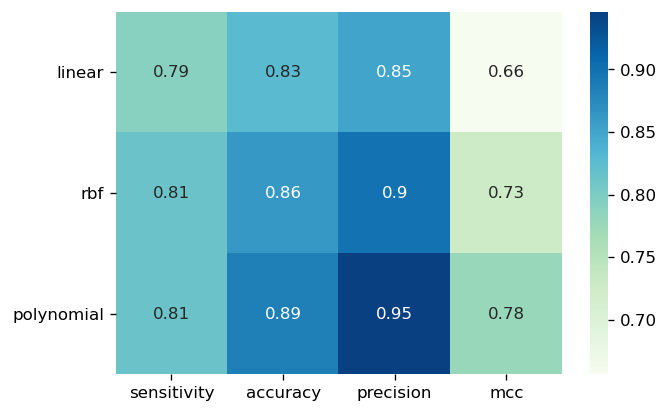

In [28]:
y_axis_labels = ['linear','rbf','polynomial']

plt.figure(dpi = 120)
ax = sns.heatmap(df.iloc[:, 1:],
                 cmap = 'GnBu',
                 annot = True,
                 yticklabels = y_axis_labels,
                )

plt.yticks(rotation=0) 
plt.show()

Polynomial SVM showed best performance overall